In [ ]:
from tqdm import tqdm
import scanpy as sc

In [59]:
sample_folders = ["GSM4456251_ALL1", "GSM4456252_ALL3", "GSM4456253_ALL8", "GSM4456254_ALL9", "GSM4456255_ALL10", "GSM4456256_ALL12", "GSM4456257_ALL10-d15", "GSM4456258_ALL12-d15",]
# Create an empty list first
adata_list = []

# use a for-loop to read in all the files
for sample in tqdm(sample_folders): 
    pathname = "/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/"+sample
    print("Reading files at:" + pathname)
    adata=sc.read_10x_mtx("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/"+sample)
    patient_id = sample[:4] # extract the patient info
    sample_id = sample # extract the sample info
    # we add the patient and sample information into our adata object, specifically, the .obs slot
    # .obs stands for observation i.e every single-cell is an observation
    adata.obs["patient_id"] = patient_id
    adata.obs["sample_id"] = sample_id
    # the function will complain that we need to run this
    adata.var_names_make_unique() # a var, stands for variable i.e. genes. so this function is to make the gene names unique
    # why? because multiple ensembl gene ids can map to the same gene e.g. spliced isoforms. sometimes we care about spliced isoforms and we want to keep them separate
    # so something like IL6, would be become IL6 and IL6-1
    adata_list.append(adata) # append to my adata_list above, iteratively

# finally, concatenate all the objects into a singlular one
adata = sc.concat(adata_list)
# print what the final object looks like
adata

In [ ]:
adata.write_h5ad("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/adata_rb.h5ad", compression="gzip")

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

adata = sc.read_h5ad("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/adata_rb.h5ad")
adata

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.5 pynndescent==0.5.10


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 50747 × 32738
    obs: 'patient_id', 'sample_id'

In [2]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

#adata = sc.read_10x_mtx('/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/ALL1',
    #var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    #cache=True)                             # write a cache file for faster subsequent reading


#adata = sc.read_10x_mtx(
    #'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    #var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    #cache=True)                              # write a cache file for faster subsequent reading

#adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:06)


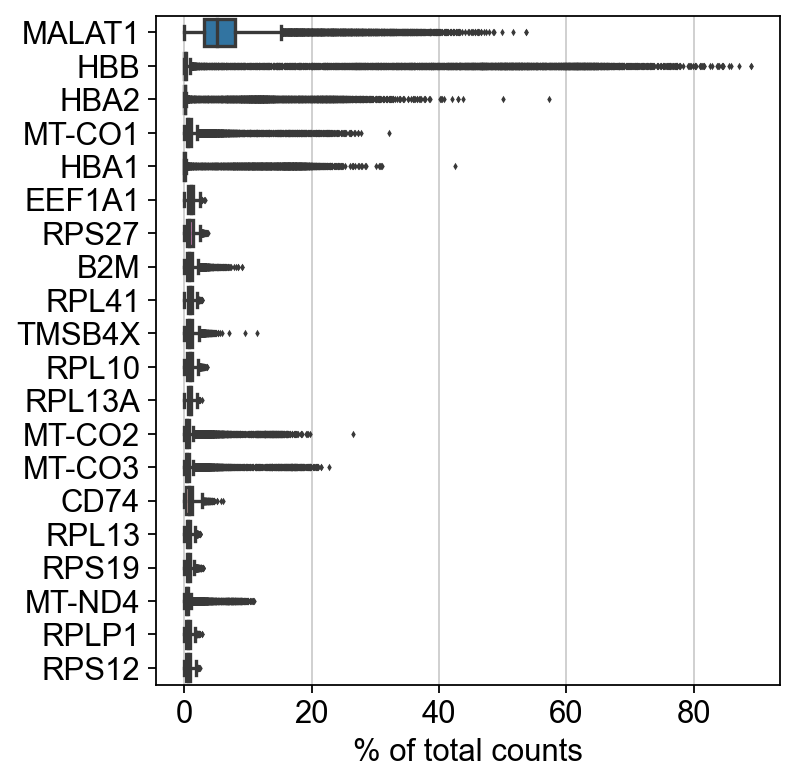

In [3]:
sc.pl.highest_expr_genes(adata, n_top=20, )
#Show those genes that yield the highest fraction of counts in each single cell, across all cells.

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1270 cells that have less than 200 genes expressed


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


filtered out 11255 genes that are detected in less than 3 cells


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
#Mitochondrial genes for quality control.

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


A violin plot of some of the computed quality measures:

the number of genes expressed in the count matrix
the total counts per cell
the percentage of counts in mitochondrial genes

High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


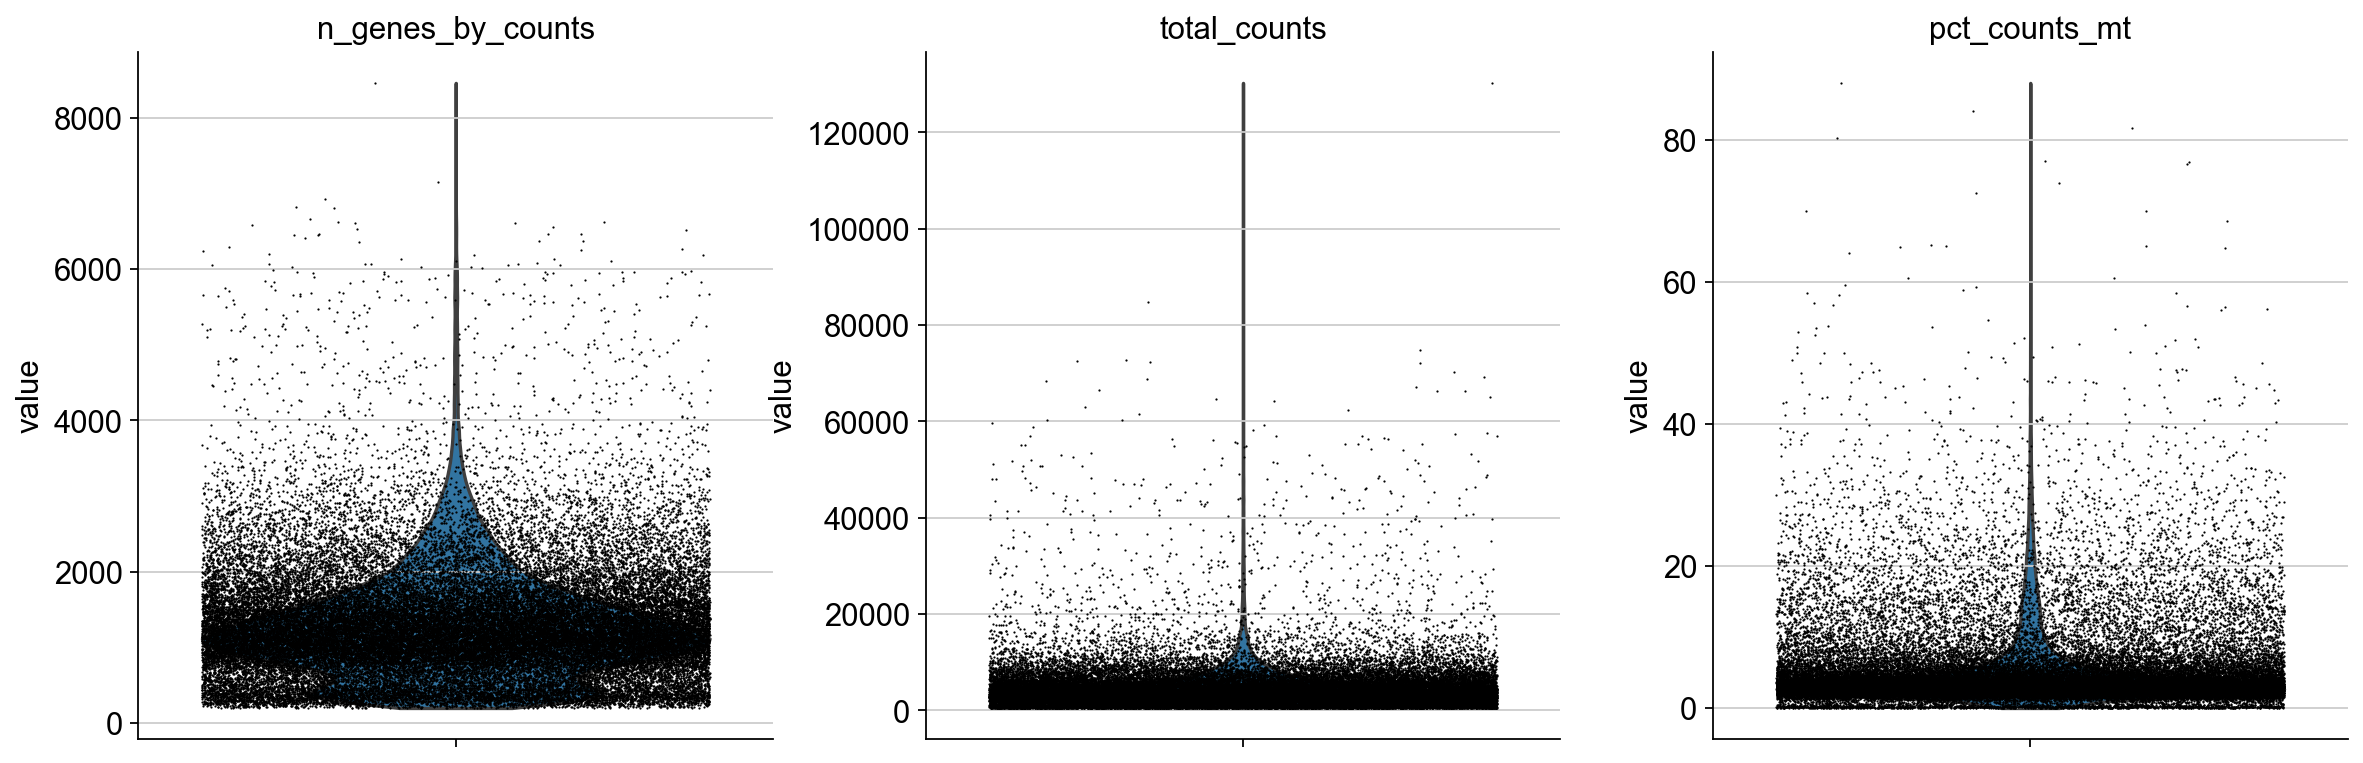

In [6]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)


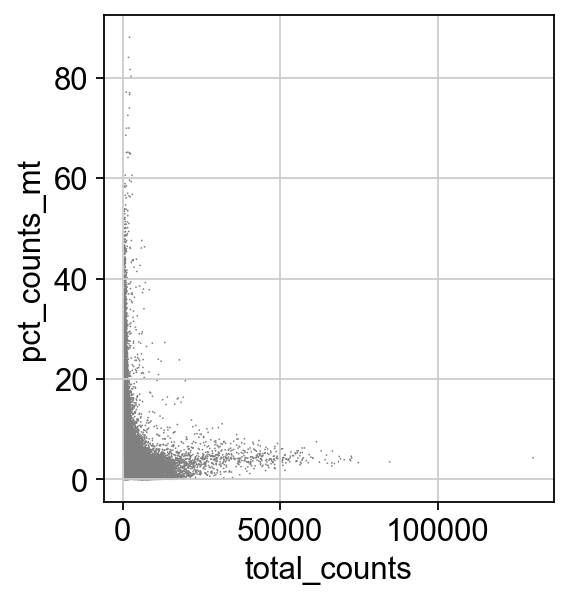

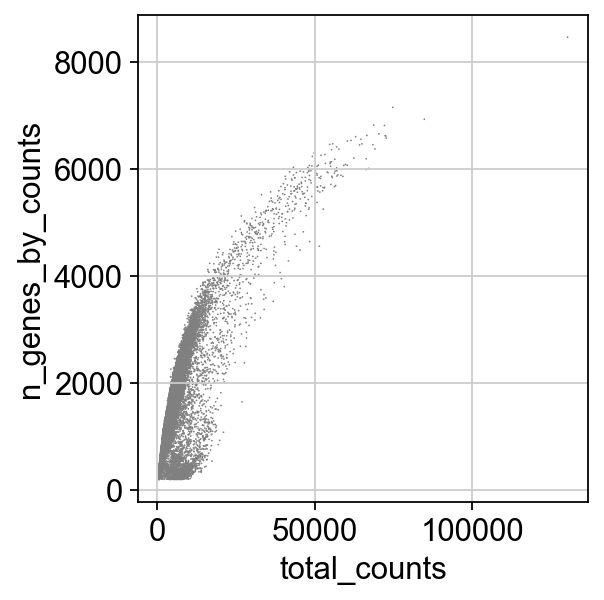

In [7]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [8]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


normalizing counts per cell
    finished (0:00:02)


In [9]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


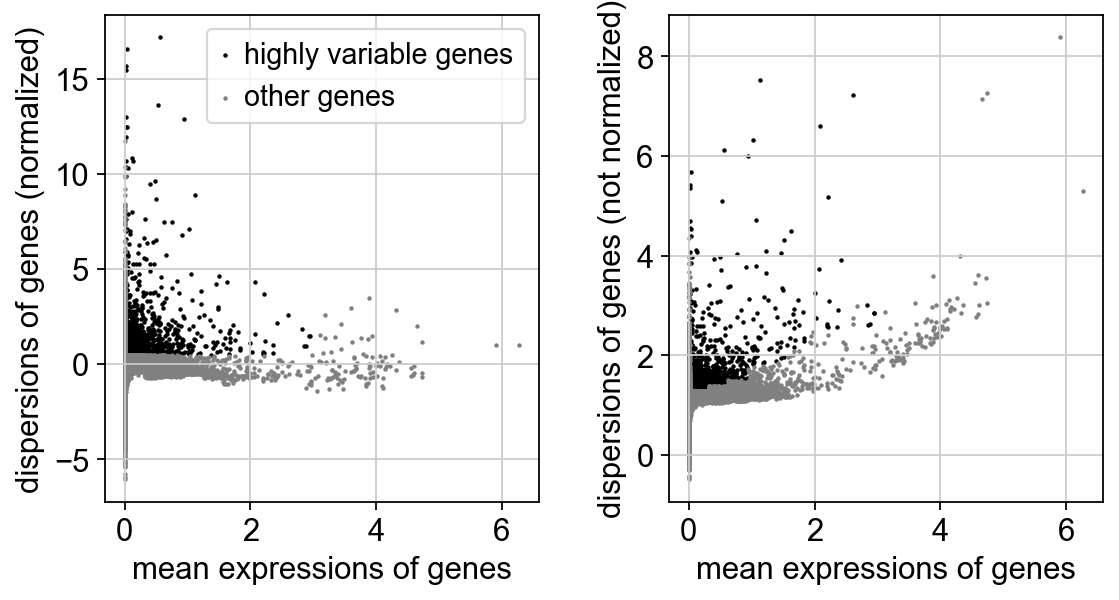

In [10]:
sc.pl.highly_variable_genes(adata)


In [11]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]


In [12]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:02:29)


In [13]:
#Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:07)


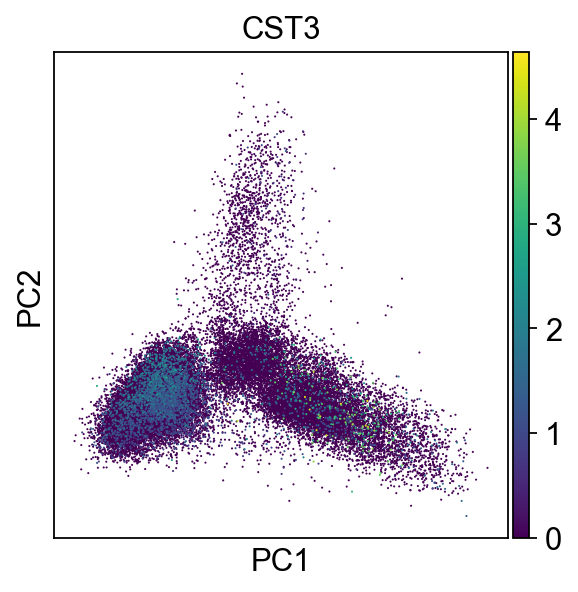

In [14]:
sc.pl.pca(adata, color='CST3')

In [20]:
#adata.write(results_file)

What are the Single PCs to the total variance in the data. 

This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function sc.tl.louvain() or tSNE sc.tl.tsne(). In our experience, often a rough estimate of the number of PCs does fine.

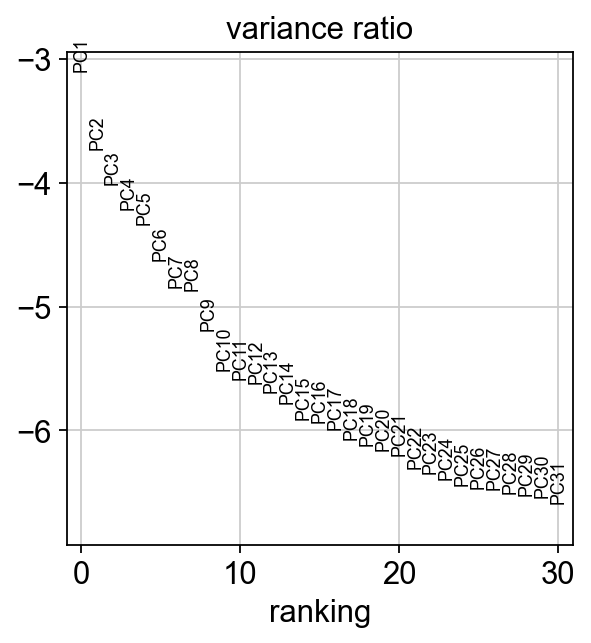

In [21]:
sc.pl.pca_variance_ratio(adata, log=True)

In [22]:
#adata.write(results_file)


In [18]:
#Computing the neighborhood graph
#compute the neighborhood graph of cells using the PCA representation of the data matrix.

sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:57)


In [19]:
#Embedding the neighborhood graph
#embedding the graph in two dimensions using UMAP -> potentially more faithful to the global connectivity of the manifold than tSNE, 
#i.e., it better preserves trajectories. In some ocassions, you might still observe disconnected clusters and similar connectivity violations

sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:37)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:27)


In [23]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:58)


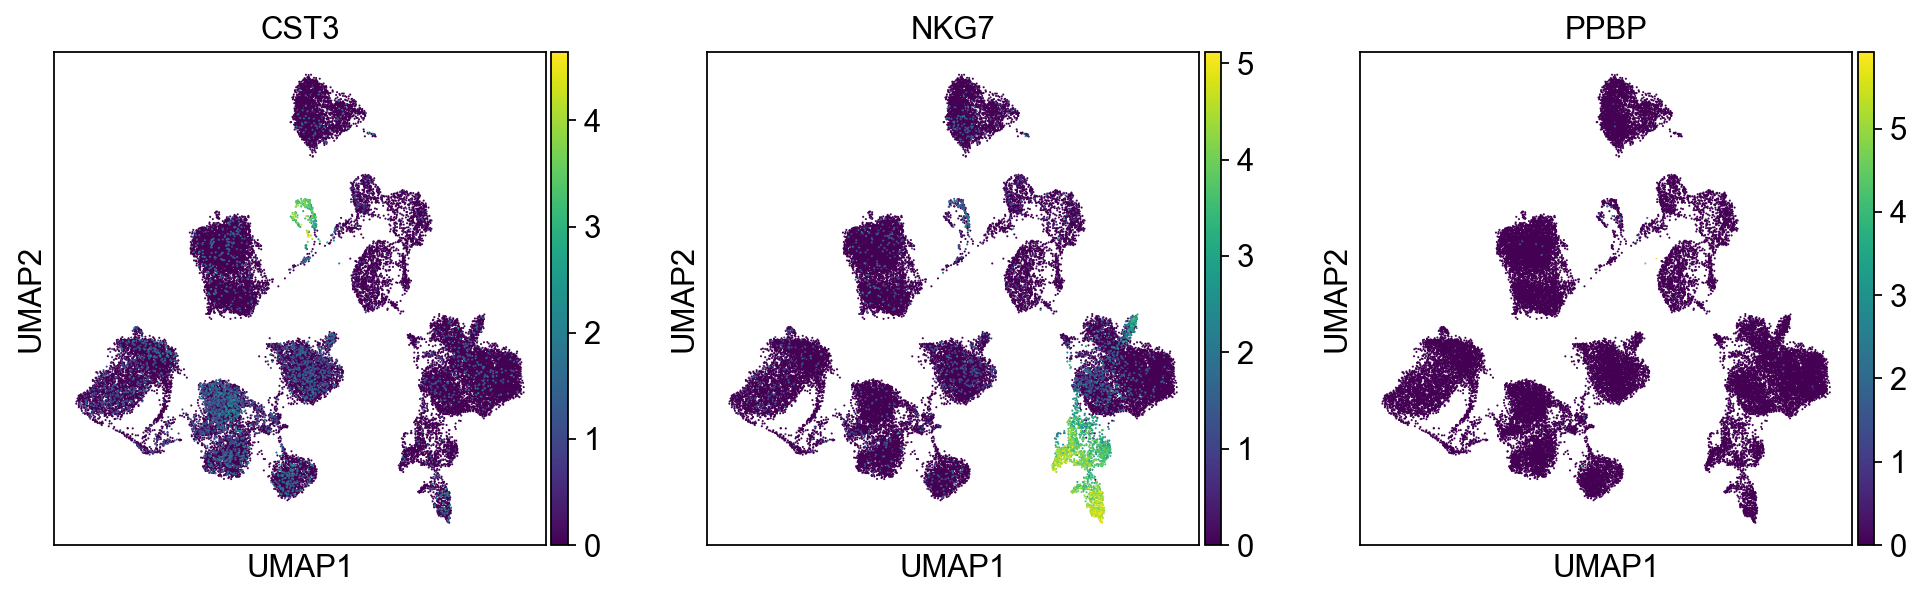

In [24]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


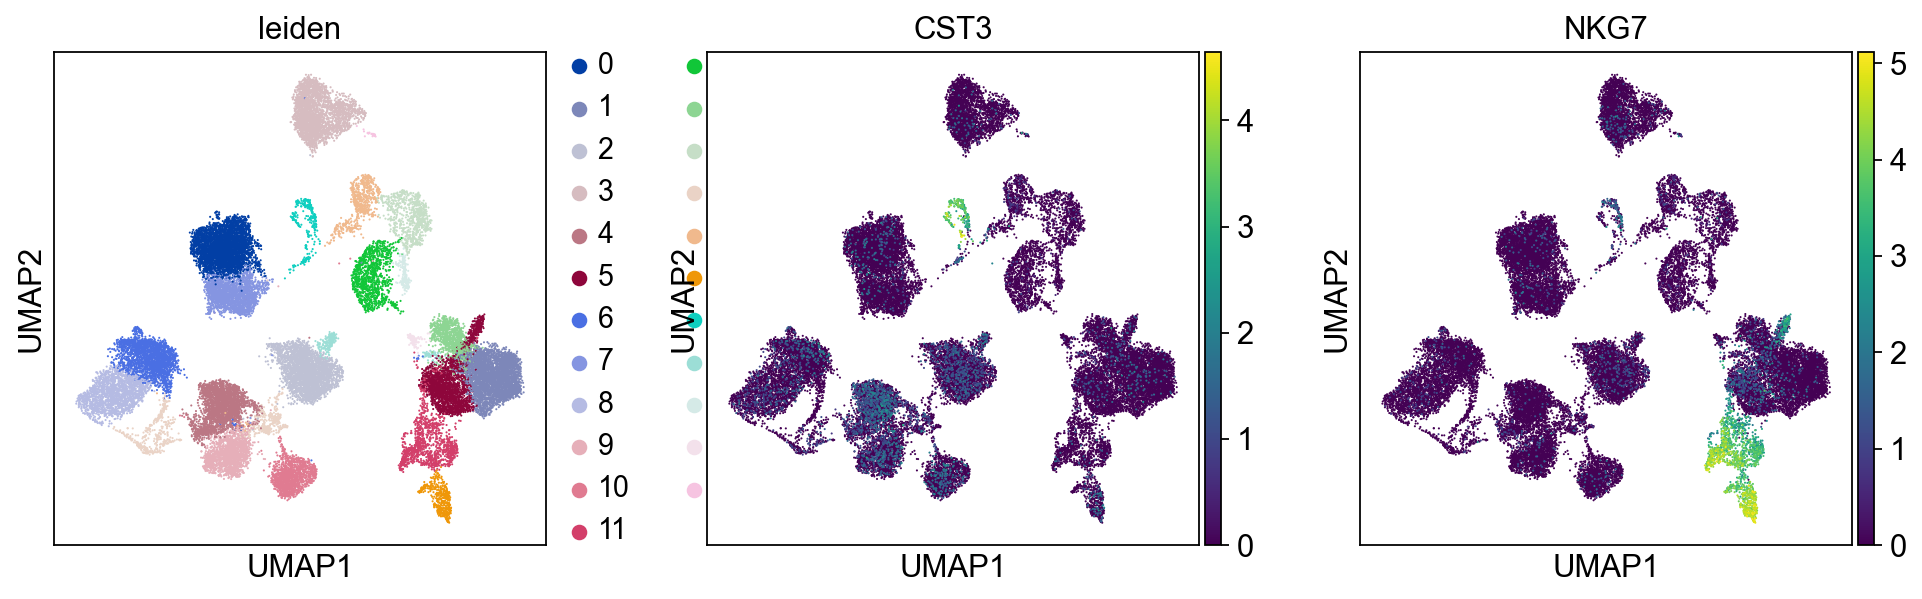

In [25]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:29)


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

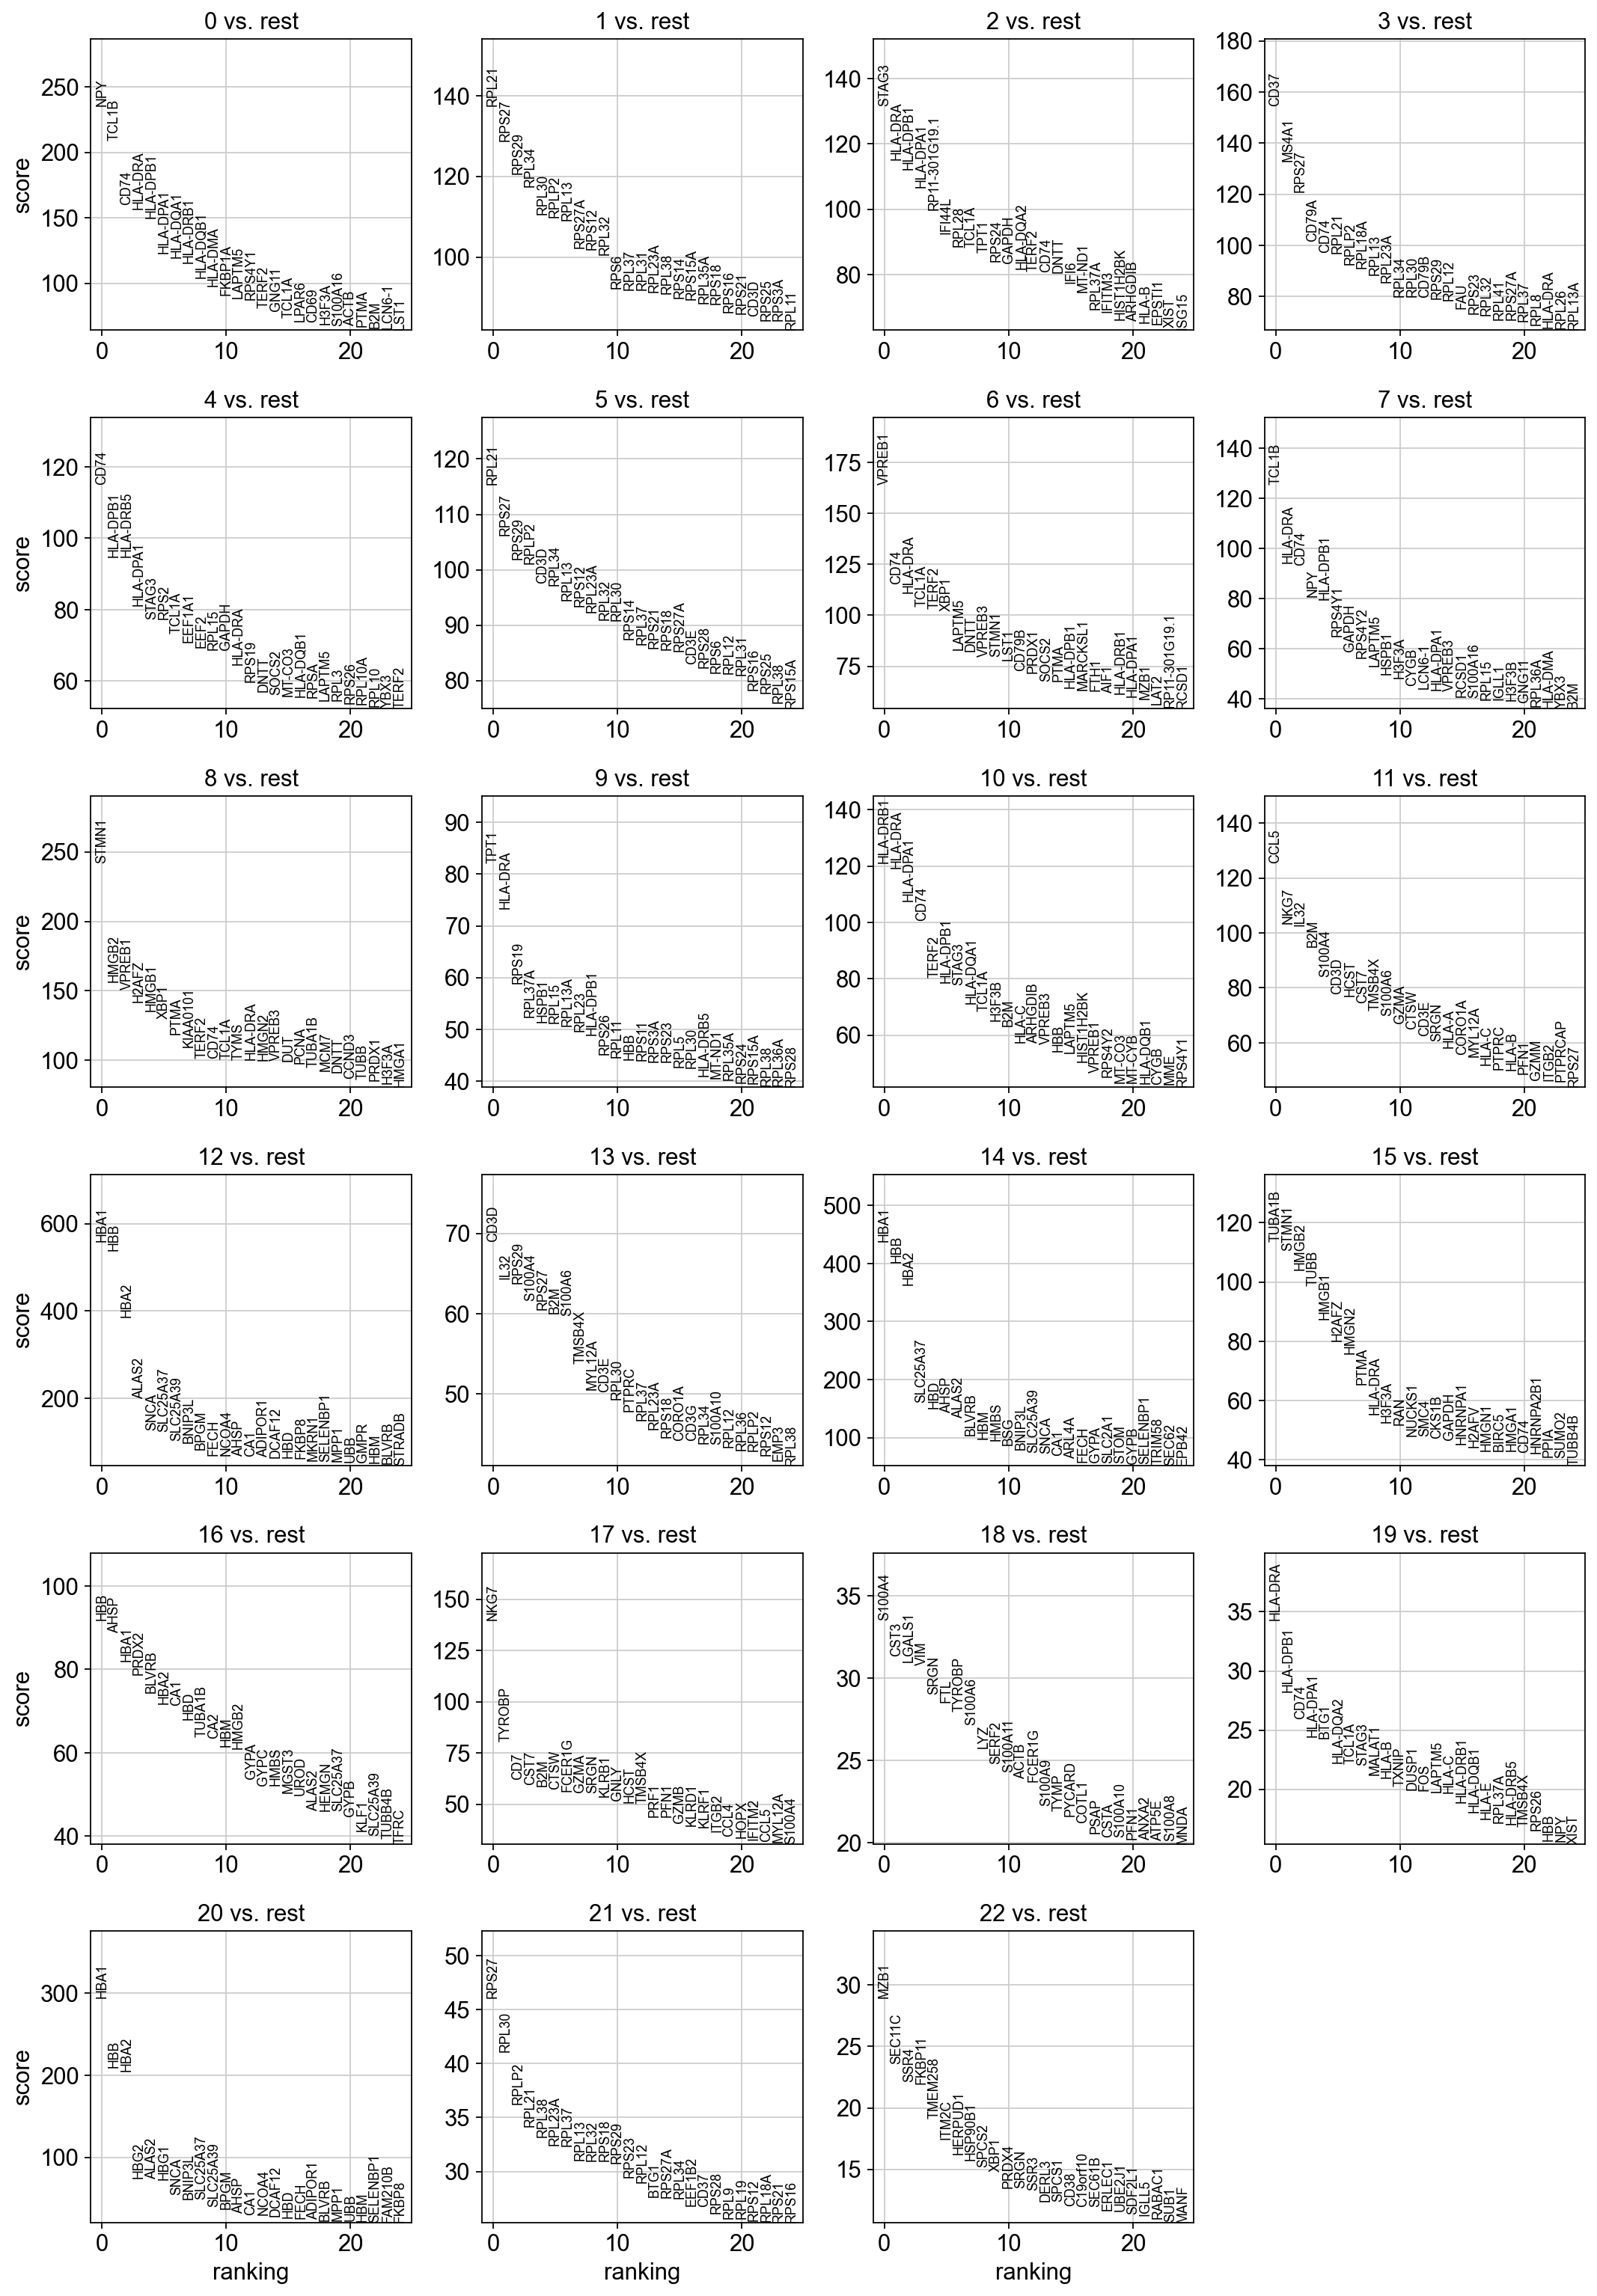

In [26]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [27]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:04:04)


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

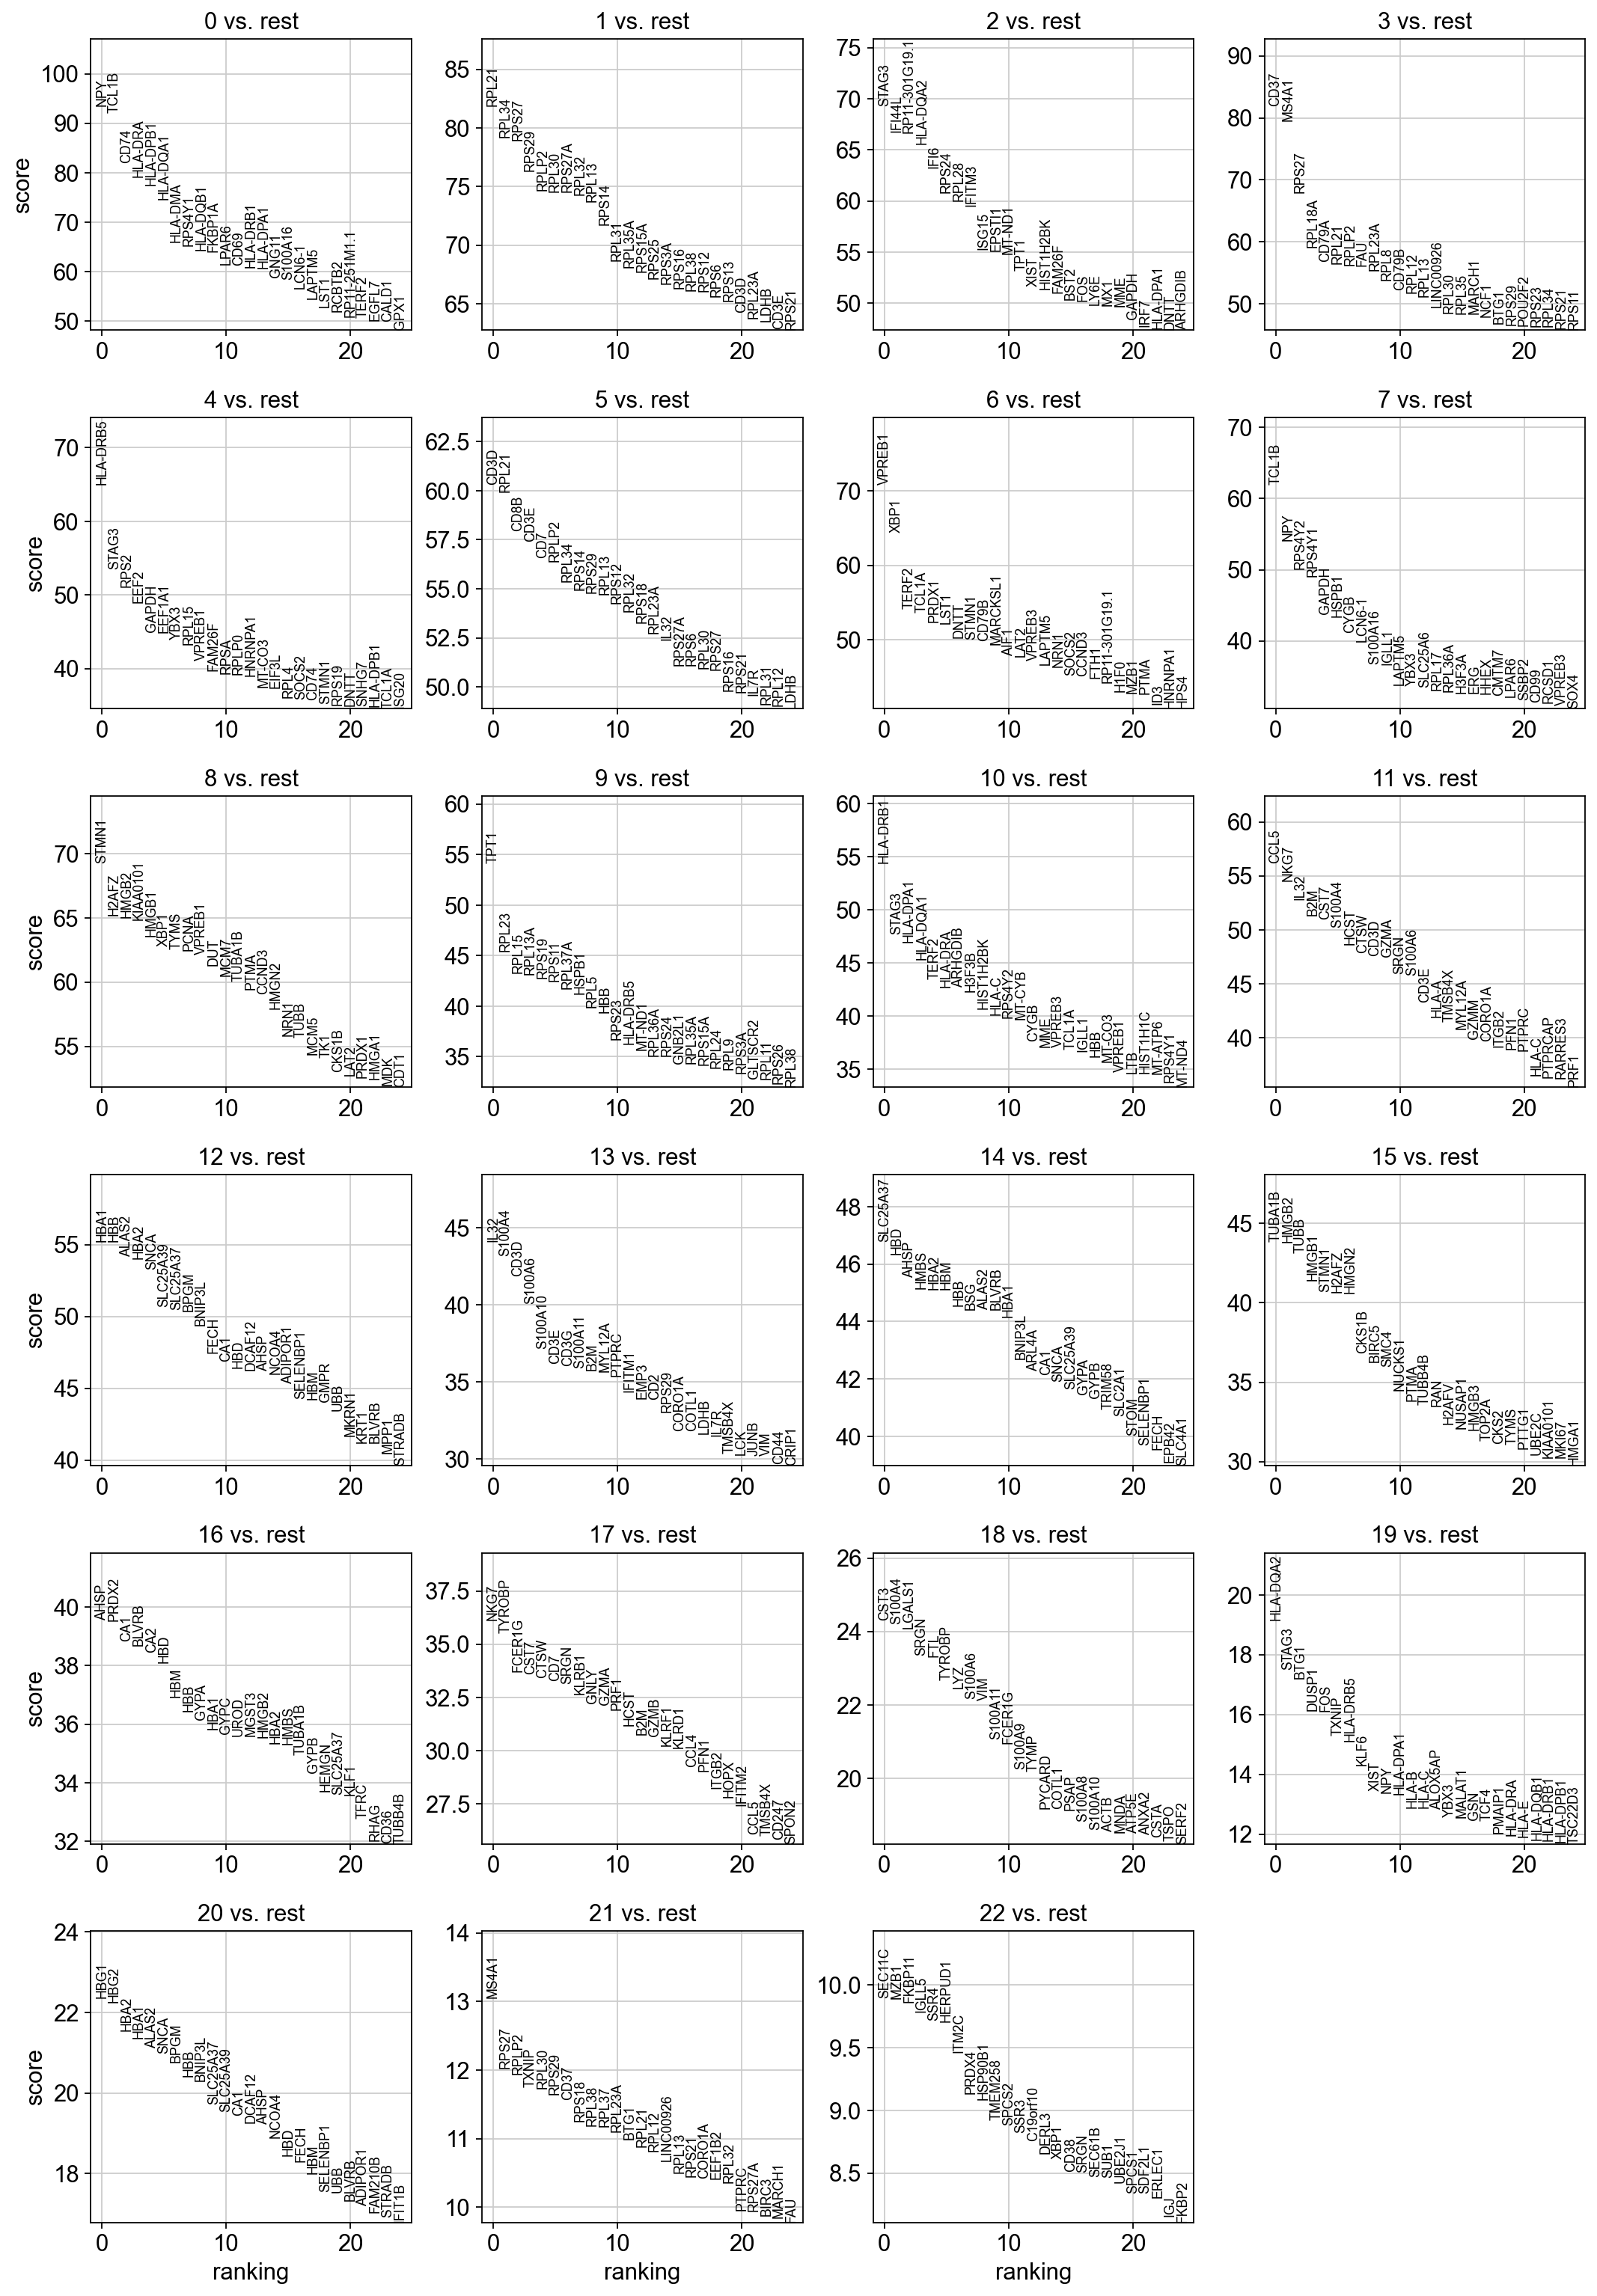

In [28]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [29]:
#adata = sc.read(results_file)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0      1              2       3         4      5       6       7  \
0       NPY  RPL21          STAG3    CD37  HLA-DRB5   CD3D  VPREB1   TCL1B   
1     TCL1B  RPL34         IFI44L   MS4A1     STAG3  RPL21    XBP1     NPY   
2      CD74  RPS27  RP11-301G19.1   RPS27      RPS2   CD8B   TERF2  RPS4Y2   
3   HLA-DRA  RPS29       HLA-DQA2  RPL18A      EEF2   CD3E   TCL1A  RPS4Y1   
4  HLA-DPB1  RPLP2           IFI6   CD79A     GAPDH    CD7   PRDX1   GAPDH   

          8       9  ...       13        14      15     16      17      18  \
0     STMN1    TPT1  ...     IL32  SLC25A37  TUBA1B   AHSP    NKG7    CST3   
1     H2AFZ   RPL23  ...   S100A4       HBD   HMGB2  PRDX2  TYROBP  S100A4   
2     HMGB2   RPL15  ...     CD3D      AHSP    TUBB    CA1  FCER1G  LGALS1   
3  KIAA0101  RPL13A  ...   S100A6      HMBS   HMGB1  BLVRB    CST7    SRGN   
4     HMGB1   RPS19  ...  S100A10      HBA2   STMN1    CA2    CTSW     FTL   

         19     20     21      22  
0  HLA-DQA2   HBG1  MS4A1  SEC11C  
1     STAG3   HBG2  RPS27    MZB1  
2      BTG1   HBA2  RPLP2  FKBP11  
3     DUSP1   HBA1  TXNIP   IGLL5  
4       FOS  ALAS2  RPL30    SSR4  

[5 rows x 23 columns]

In [30]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(5)

0_n        0_s    1_n        1_s            2_n        2_s     3_n  \
0       NPY  93.438721  RPL21  81.849525          STAG3  69.262306    CD37   
1     TCL1B  92.033936  RPL34  79.200012         IFI44L  66.719498   MS4A1   
2      CD74  81.925598  RPS27  78.935417  RP11-301G19.1  66.609291   RPS27   
3   HLA-DRA  79.160393  RPS29  76.297523       HLA-DQA2  65.535469  RPL18A   
4  HLA-DPB1  77.493477  RPLP2  74.652222           IFI6  63.168850   CD79A   

         3_s       4_n        4_s  ...    18_n       18_s      19_n  \
0  81.882347  HLA-DRB5  64.983231  ...    CST3  24.314203  HLA-DQA2   
1  79.457184     STAG3  53.487888  ...  S100A4  24.199041     STAG3   
2  67.827545      RPS2  51.056126  ...  LGALS1  24.085878      BTG1   
3  59.118740      EEF2  48.933781  ...    SRGN  23.339638     DUSP1   
4  56.785831     GAPDH  44.944801  ...     FTL  23.312510       FOS   

        19_s   20_n       20_s   21_n       21_s    22_n      22_s  
0  19.161098   HBG1  22.345943  MS4A1  13.044307  SEC11C  9.891627  
1  17.498957   HBG2  22.245150  RPS27  12.021687    MZB1  9.890816  
2  17.194572   HBA2  21.535131  RPLP2  11.935285  FKBP11  9.861295  
3  16.122103   HBA1  21.347378  TXNIP  11.751511   IGLL5  9.783797  
4  16.109337  ALAS2  21.102819  RPL30  11.727158    SSR4  9.713975  

[5 rows x 46 columns]

ranking genes
    finished (0:00:22)


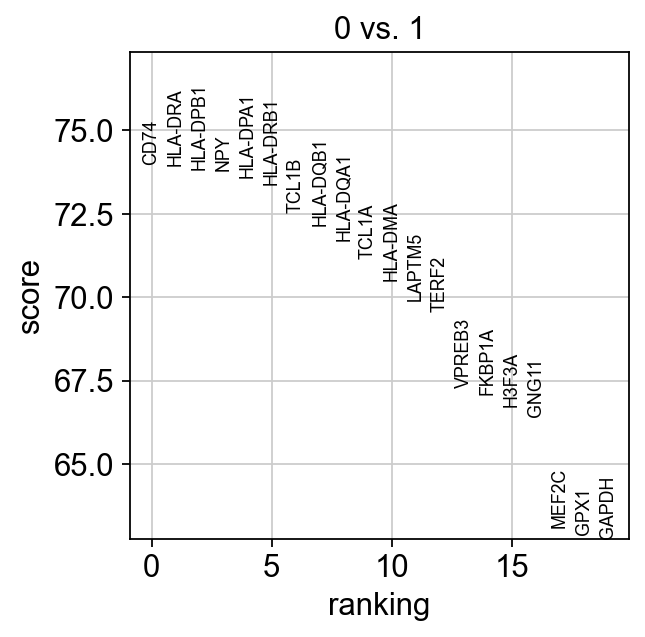

In [31]:
adata.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


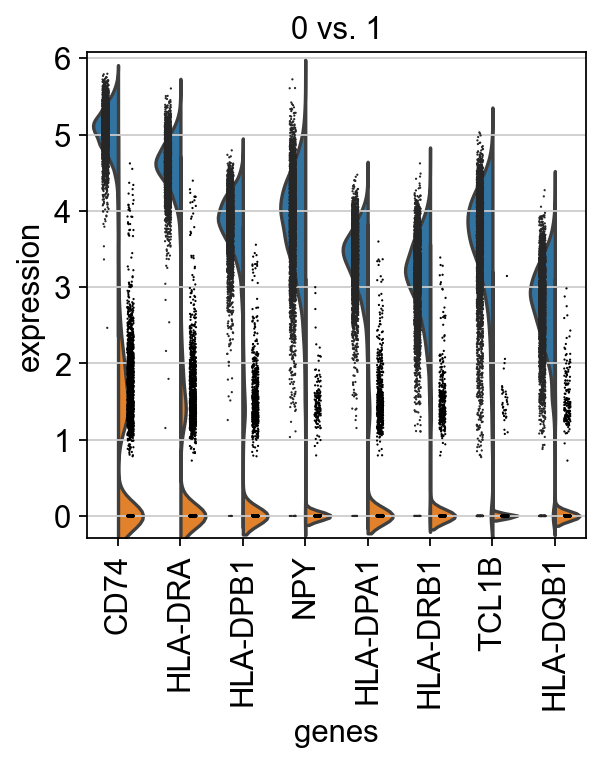

In [32]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)


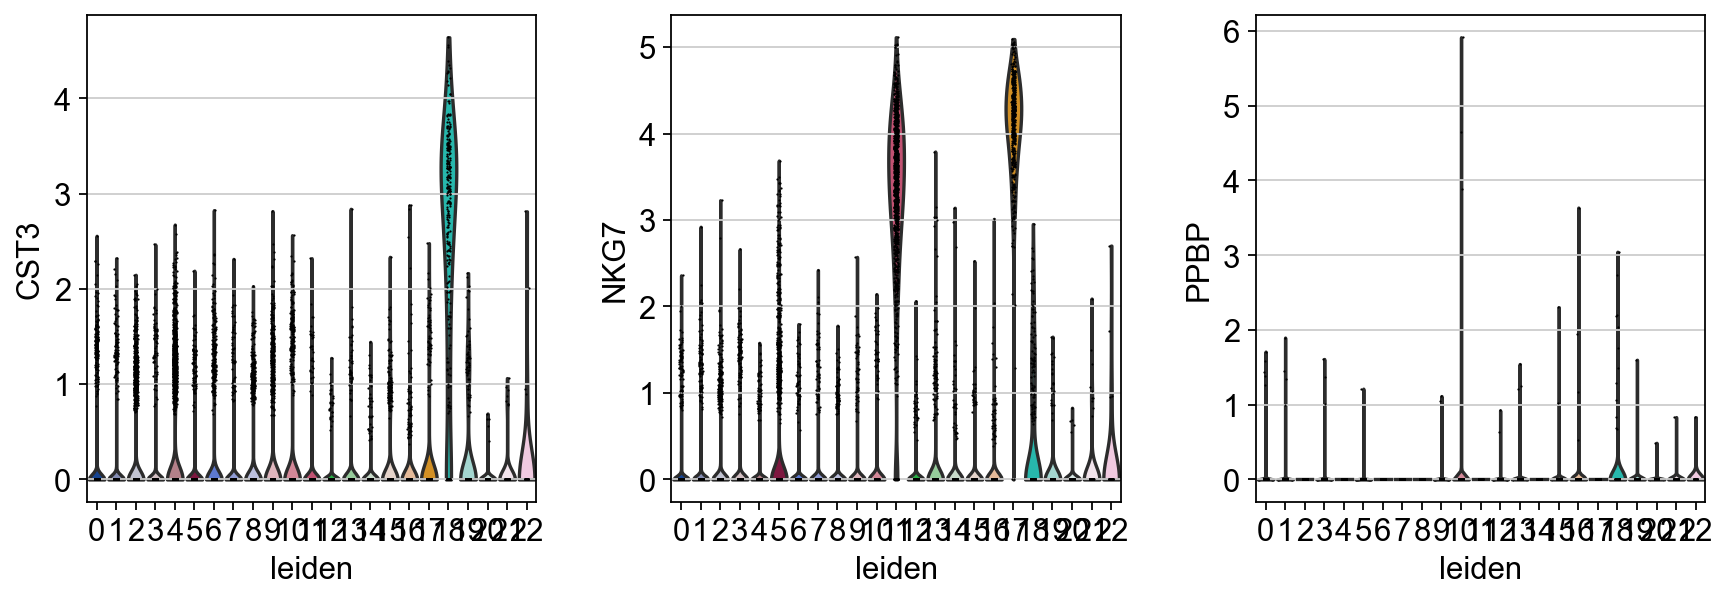

In [33]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


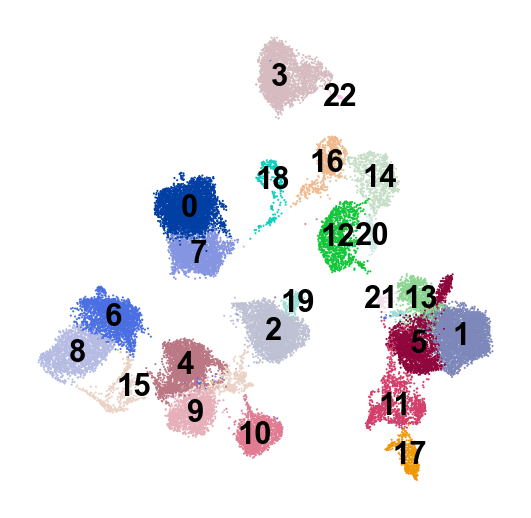

In [34]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
#sc.pl.dotplot(adata, marker_genes, groupby='leiden');
#sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);
